## Exploratory Data Analysis (EDA)

Conducting EDA on US top charting songs from 1921- 2020 to examine relationship between variables and other patterns in the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# shows plots inline
%matplotlib inline

In [2]:
# To suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)



In [3]:
df=pd.read_csv('/Users/josephlim/Desktop/Data Science/Capstone Projects/Capstone project- Spotify/Data/Cleaned Data/US_1921-2020_final.csv')

In [4]:
df.shape

(586672, 14)

In [5]:
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.645  0.4450    0   -13.338     1       0.4510         0.674   
1         0.695  0.2630    0   -22.136     1       0.9570         0.797   
2         0.434  0.1770    1   -21.180     1       0.0512         0.994   
3         0.321  0.0946    7   -27.961     1       0.0504         0.995   
4         0.402  0.1580    3   -16.900     0       0.0390         0.989   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0            0.7440     0.151    0.127  104.851       126903               3   
1            0.0000     0.148    0.655  102.009        98200               1   
2            0.0218     0.212    0.457  130.418       181640               5   
3            0.9180     0.104    0.397  169.980       176907               3   
4            0.1300     0.311    0.196  103.220       163080               4   

   popularity  
0           6  
1           0  
2           0  
3           0  
4           0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      586672 non-null  float64
 1   energy            586672 non-null  float64
 2   key               586672 non-null  int64  
 3   loudness          586672 non-null  float64
 4   mode              586672 non-null  int64  
 5   speechiness       586672 non-null  float64
 6   acousticness      586672 non-null  float64
 7   instrumentalness  586672 non-null  float64
 8   liveness          586672 non-null  float64
 9   valence           586672 non-null  float64
 10  tempo             586672 non-null  float64
 11  duration_ms       586672 non-null  int64  
 12  time_signature    586672 non-null  int64  
 13  popularity        586672 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 62.7 MB


### Spotify Audio Features

Spotify provides breaks down its track data using its audio features. The Spotify Web API developer guide defines them as follows:
- Duration: The duration of the track in milliseconds.
- Danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
- Energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
- Mode: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- Speechiness: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- Valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.
- Time signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

Because the term "mode" can be confusing given the context of statistical analysis, it will be referred to as "musical mode"(m_mode)

In [7]:
df_m= df.rename(columns={'mode':'m_mode'})

### Distributions of Data
#### Categorical features
There are two categorical features in this datasets: key and mode. 

In [8]:
df_cat=df_m[['key','m_mode']].copy()

In [9]:
df_cat.head()

key  m_mode
0    0       1
1    0       1
2    1       1
3    7       1
4    3       0

Keys are denoted as numbers.0 represents C, and each index represents a semitone increase in key. Musical mode is also denoted as integers, but it is a binary data that indicates whether the song is a major/ minor key. 0 represents minor keys, while 1 represents major.

Values will be replaced to reflect corresponding categories.

In [10]:
df_cat['key'].replace({0:'C',1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#',7:'G',8:'Ab', 9:'A', 10:'Bb',11:'B'}, inplace=True)
df_cat['m_mode'].replace({0:'minor',1:'major'}, inplace=True)

In [11]:
df_cat['key'].value_counts()

C     74950
G     73779
D     66552
A     65128
F     53614
E     48220
C#    41736
B     39132
Bb    37710
Ab    33460
F#    30856
D#    21535
Name: key, dtype: int64

<AxesSubplot: xlabel='key', ylabel='count'>

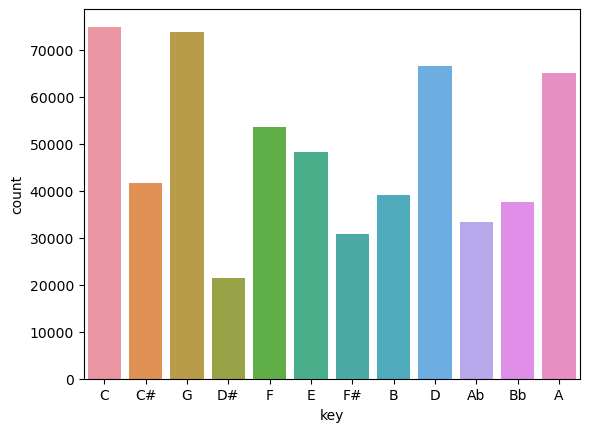

In [12]:
sns.countplot(data=df_cat, x='key')

The most common keys are C and G.

In [13]:
df_cat['m_mode'].value_counts()

major    386498
minor    200174
Name: m_mode, dtype: int64

<AxesSubplot: xlabel='m_mode', ylabel='count'>

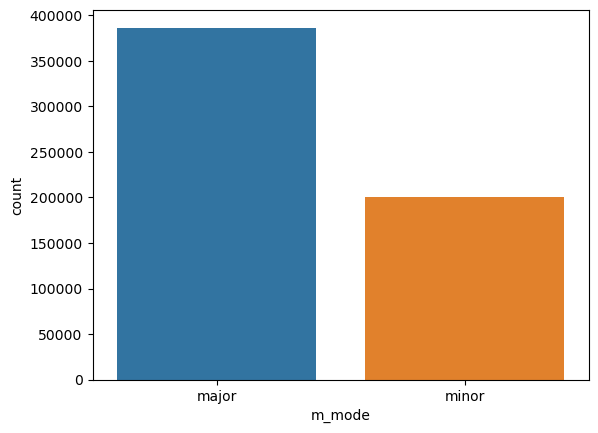

In [14]:
sns.countplot(data= df_cat, x='m_mode')

There are more songs that are major keys.

#### Numerical features

We will now conduct analysis on numerical features of the dataset.

In [15]:
# Filtering numerical data.
cat_columns= df_cat.columns
df_num= df_m.drop(cat_columns, axis=1)

In [16]:
df_num.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'popularity'],
      dtype='object')

In [17]:
df_num.describe().T

count           mean            std     min          25%  \
danceability      586672.0       0.563594       0.166103     0.0       0.4530   
energy            586672.0       0.542036       0.251923     0.0       0.3430   
loudness          586672.0     -10.206067       5.089328   -60.0     -12.8910   
speechiness       586672.0       0.104864       0.179893     0.0       0.0340   
acousticness      586672.0       0.449863       0.348837     0.0       0.0969   
instrumentalness  586672.0       0.113451       0.266868     0.0       0.0000   
liveness          586672.0       0.213935       0.184326     0.0       0.0983   
valence           586672.0       0.552292       0.257671     0.0       0.3460   
tempo             586672.0     118.464857      29.764108     0.0      95.6000   
duration_ms       586672.0  230051.167286  126526.087418  3344.0  175093.0000   
time_signature    586672.0       3.873382       0.473162     0.0       4.0000   
popularity        586672.0      27.570053      18.370642     0.0      13.0000   

                            50%           75%          max  
danceability           0.577000       0.68600        0.991  
energy                 0.549000       0.74800        1.000  
loudness              -9.243000      -6.48200        5.376  
speechiness            0.044300       0.07630        0.971  
acousticness           0.422000       0.78500        0.996  
instrumentalness       0.000024       0.00955        1.000  
liveness               0.139000       0.27800        1.000  
valence                0.564000       0.76900        1.000  
tempo                117.384000     136.32100      246.381  
duration_ms       214893.000000  263867.00000  5621218.000  
time_signature         4.000000       4.00000        5.000  
popularity            27.000000      41.00000      100.000

In [18]:
df_num.shape

(586672, 12)

In [19]:
df_num.sort_values('popularity', ascending=False)

danceability  energy  loudness  speechiness  acousticness  \
93802          0.677  0.6960    -6.181       0.1190        0.3210   
93803          0.585  0.4360    -8.761       0.0601        0.7210   
93804          0.778  0.6950    -6.865       0.0913        0.1750   
92810          0.680  0.8260    -5.487       0.0309        0.0212   
92811          0.653  0.5240    -9.016       0.0502        0.1120   
...              ...     ...       ...          ...           ...   
23410          0.682  0.3050    -8.558       0.0578        0.9240   
23409          0.527  0.2030   -14.199       0.0667        0.9900   
23408          0.441  0.2420   -28.776       0.0323        0.9290   
23407          0.593  0.7480    -6.514       0.4060        0.8880   
444118         0.431  0.0325   -17.961       0.0344        0.9670   

        instrumentalness  liveness  valence    tempo  duration_ms  \
93802           0.000000     0.420    0.464   90.030       198082   
93803           0.000013     0.105    0.132  143.874       242014   
93804           0.000000     0.150    0.472  149.996       132780   
92810           0.000012     0.543    0.644  118.051       215627   
92811           0.000000     0.203    0.553   83.970       160191   
...                  ...       ...      ...      ...          ...   
23410           0.000000     0.119    0.910  152.850       198053   
23409           0.000012     0.129    0.688  170.733       171133   
23408           0.955000     0.116    0.528  132.060        46720   
23407           0.021800     0.680    0.732  123.634       189973   
444118          0.000000     0.355    0.391  140.434       139493   

        time_signature  popularity  
93802                4         100  
93803                4          99  
93804                4          98  
92810                4          97  
92811                4          97  
...                ...         ...  
23410                3           0  
23409                4           0  
23408                4           0  
23407                4           0  
444118               3           0  

[586672 rows x 12 columns]

Popularity score should be normalized to better understand its trends and for later use

In [20]:
def score_normalization(score, max_score):
    popularity_normalized= 1- score/ max_score
    
    return popularity_normalized

In [21]:
df_num['popularity']=df_num['popularity'].apply(lambda x:score_normalization(x,df_num['popularity'].max()))

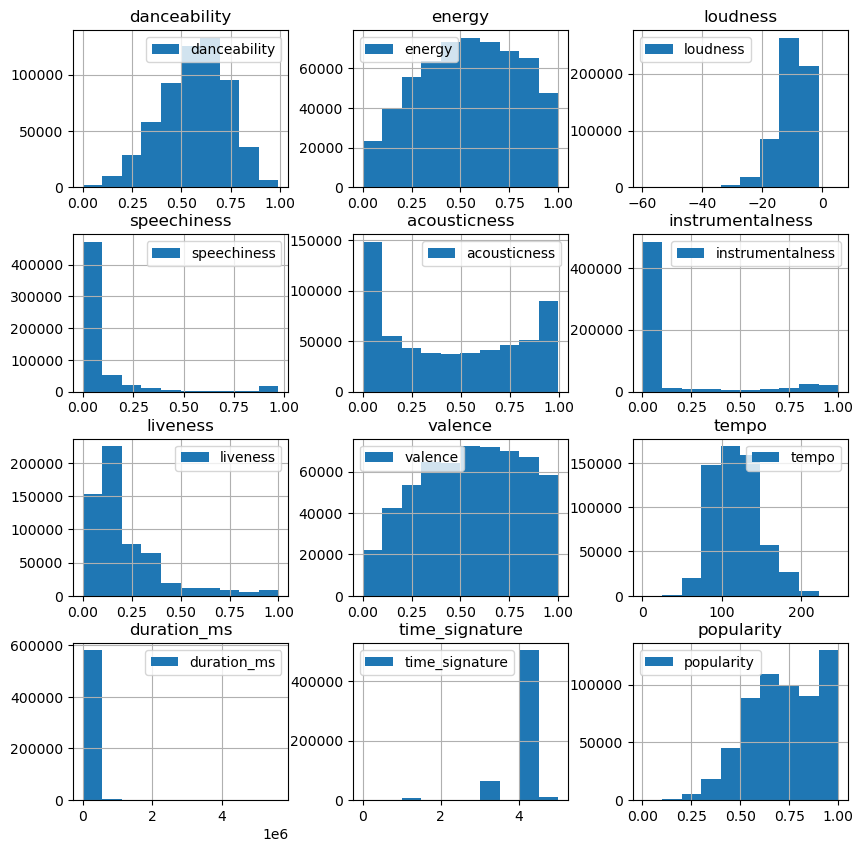

In [22]:
hist= df_num.hist(bins=10,legend=True, figsize=(10,10))

Energy and valence have noticeably similar distribution. Danceability, loudness, and energy have similar distribution. 

Most top charting songs tend to be short in duration.They tend to have high energy and loudness, around 0.6 and -10dB, respectively. 
Most top charting tracks also tend to contain musical vocals(such as singing or rapping),rather than spoken words (as heard in audio books). They also scored low "liveness", which means they are often polished studio recordings than live performances. There is lower likelihood that top charting songs are acoustic. In terms of valence, the highest distribution was seen between 0.25 and 0.75. Similarly, the highest distribution in danceability was in between 0.5-0.75. The largest tempo distribution in top charting songswas in between 90 to 150 BPM.

#### More in-depth look at individual features:

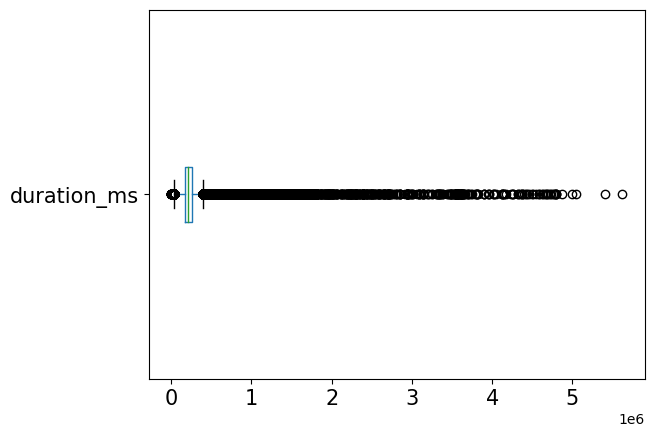

In [23]:
boxplot_dur= df_num.boxplot(column='duration_ms', grid=False, vert=False, fontsize=15)

In [24]:
mean= df_num['duration_ms'].mean()
q25, q75= np.percentile(df_num['duration_ms'],[25,75])
iqr= np.subtract(q75,q25)
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('maximum', maximum)

mean: 230051.16728597923
maximum 397028.0


In [25]:
outliers= df_num[df_num['duration_ms']>maximum]
len(outliers)

25254

Top charting songs have mean length of 230051.167 ms. Of 586672 songs, 4% of songs(25254 songs) were longer than 397028.0 ms. 

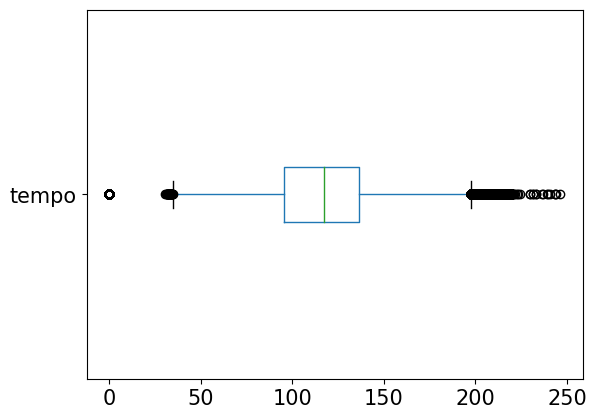

In [26]:
boxplot_tempo= df_num.boxplot(column='tempo', grid=False, vert=False, fontsize=15)

In [27]:
mean= df_num['tempo'].mean()


q25,q75= np.percentile(df_num['tempo'],[25,75])
iqr= np.subtract(q75,q25)
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('maximum', maximum)

mean: 118.46485662687157
maximum 197.4025


In [28]:
outliers= df_num[df_num['tempo']>maximum]
len(outliers)

5336

Top charting songs tend to be medium or faster tempo, with mean tempo of around 120 BPM.  Of 586672 songs, 0.9% of songs(5336 songs) were faster than 197 BPM. 

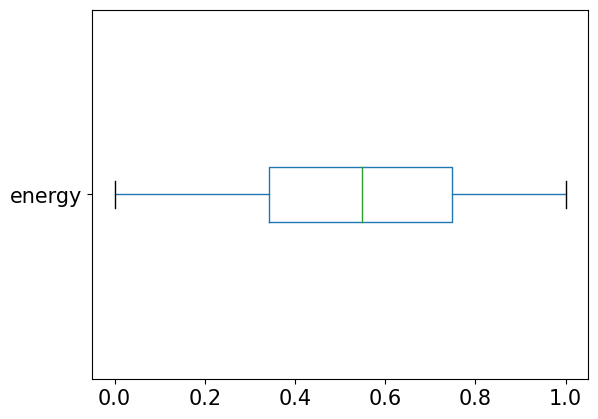

In [29]:
boxpolot_E= df_num.boxplot(column='energy', grid=False, vert=False, fontsize=15)

In [30]:
mean= df_num['energy'].mean()
mode= df_num['energy'].mode()
q25,q75= np.percentile(df_num['energy'],[25,75])
iqr= np.subtract(q75,q25)
minimum= q25- 1.5*iqr
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('minimum:', minimum)
print('mode:', mode)

mean: 0.5420359919116644
minimum: -0.2644999999999999
mode: 0    0.526
Name: energy, dtype: float64


In [31]:
outliers_min= df_num[df_num['energy']<minimum]
outliers_max=df_num[df_num['energy']>maximum]
print('lower_outlier',len(outliers_min))
print('upper_outlier:', len(outliers_max))

lower_outlier 0
upper_outlier: 0


Top charting songs had balanced energy levels across the chart, with mean energy level of 0.542. There was no outlier.

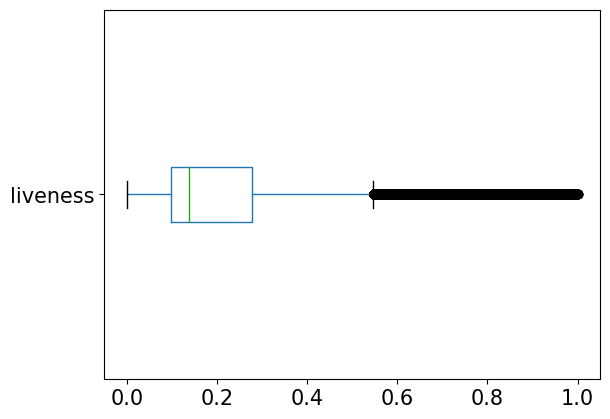

In [32]:
boxpolot_live= df_num.boxplot(column='liveness', grid=False, vert=False, fontsize=15)

In [33]:
mean= df_num['liveness'].mean()

q25,q75= np.percentile(df_num['liveness'],[25,75])
iqr= np.subtract(q75,q25)
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('maximum', maximum)

mean: 0.21393501687484662
maximum 0.5475500000000001


In [34]:
outliers= df_num[df_num['liveness']>maximum]
len(outliers)

40987

In [35]:
40987/586672

0.06986356942209616

Top charting songs tend to be polished studio recording rather than live recording, with mean liveness of 0.2139.
Of 586672 songs, around 7% of songs (40987 songs) had liveness more than 0.54755

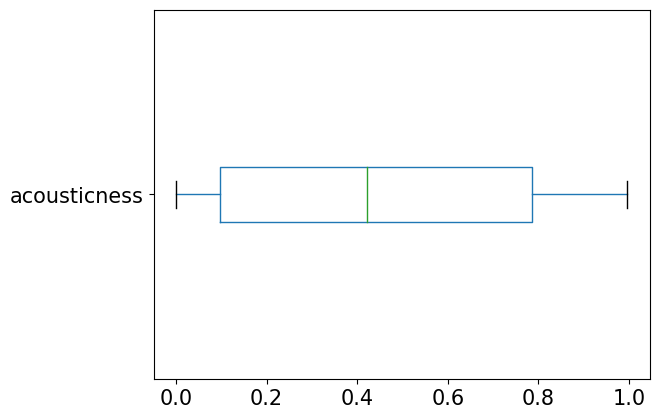

In [36]:
boxpolot_acoust= df_num.boxplot(column='acousticness', grid=False, vert=False, fontsize=15)

In [37]:
mean= df_num['acousticness'].mean()

q25,q75= np.percentile(df_num['acousticness'],[25,75])
iqr= np.subtract(q75,q25)
minimum= q25- 1.5*iqr
maximum= q75+ 1.5*iqr

print('mean:',mean)
print('mode:', mode)
print('maximum', maximum)
print('minimum:', minimum)

mean: 0.44986272444745967
mode: 0    0.526
Name: energy, dtype: float64
maximum 1.8171500000000003
minimum: -0.9352500000000001


In [38]:
outliers_min= df_num[df_num['acousticness']<minimum]
outliers_max=df_num[df_num['acousticness']>maximum]
print('lower_outlier',len(outliers_min))
print('upper_outlier:', len(outliers_max))

lower_outlier 0
upper_outlier: 0


Top charting songs had mean acousticness of 0.44986. As seen by the plot and the mean closer to the center, there is only slight preference towards non-acoustic song.

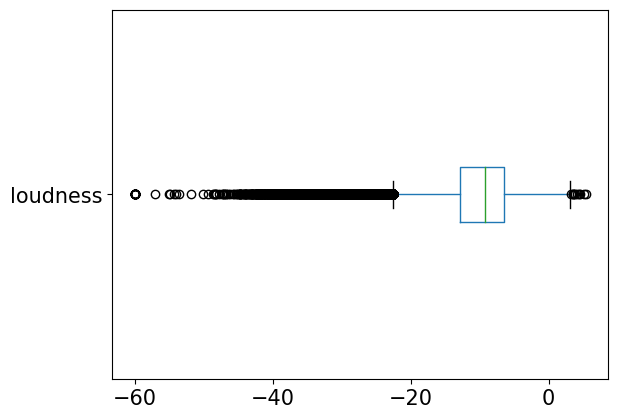

In [39]:
boxpolot_loud= df_num.boxplot(column='loudness', grid=False, vert=False, fontsize=15)

In [40]:
mean= df_num['loudness'].mean()
mode= df_num['loudness'].mode()
q25,q75= np.percentile(df_num['loudness'],[25,75])
iqr= np.subtract(q75,q25)
maximum= q75+ 1.5*iqr
minimum= q25- 1.5*iqr

print('mean:',mean)
print('mode:', mode)
print('maximum', maximum)
print('minimum:', minimum)


mean: -10.206066809051734
mode: 0   -8.026
Name: loudness, dtype: float64
maximum 3.1315
minimum: -22.5045


In [41]:
outliers_min= df_num[df_num['loudness']<minimum]
outliers_max=df_num[df_num['loudness']>maximum]
print('lower_outlier',len(outliers_min))
print('upper_outlier:', len(outliers_max))

lower_outlier 15096
upper_outlier: 10


Top charting songs tend to be loud, with mean loudness of -10.206 dB. Of 586672 songs, only around 2.57% of songs (15096 songs) had loudness quieter thaniveness more than -22.50 dB. This makes sense, given that the Spotify's loudness guideline is around -14 dB. There were also some minor outliers in the other end of extreme, with approximately 0.00006% of songs (35 songs) being louder than 3.13 dB.

### Visualizing Relationships Between Features

We have seen that there are observable patterns in individual features. We will explore if there are relationships between features.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'danceability'),
  Text(0, 1.5, 'energy'),
  Text(0, 2.5, 'key'),
  Text(0, 3.5, 'loudness'),
  Text(0, 4.5, 'mode'),
  Text(0, 5.5, 'speechiness'),
  Text(0, 6.5, 'acousticness'),
  Text(0, 7.5, 'instrumentalness'),
  Text(0, 8.5, 'liveness'),
  Text(0, 9.5, 'valence'),
  Text(0, 10.5, 'tempo'),
  Text(0, 11.5, 'duration_ms'),
  Text(0, 12.5, 'time_signature'),
  Text(0, 13.5, 'popularity')])

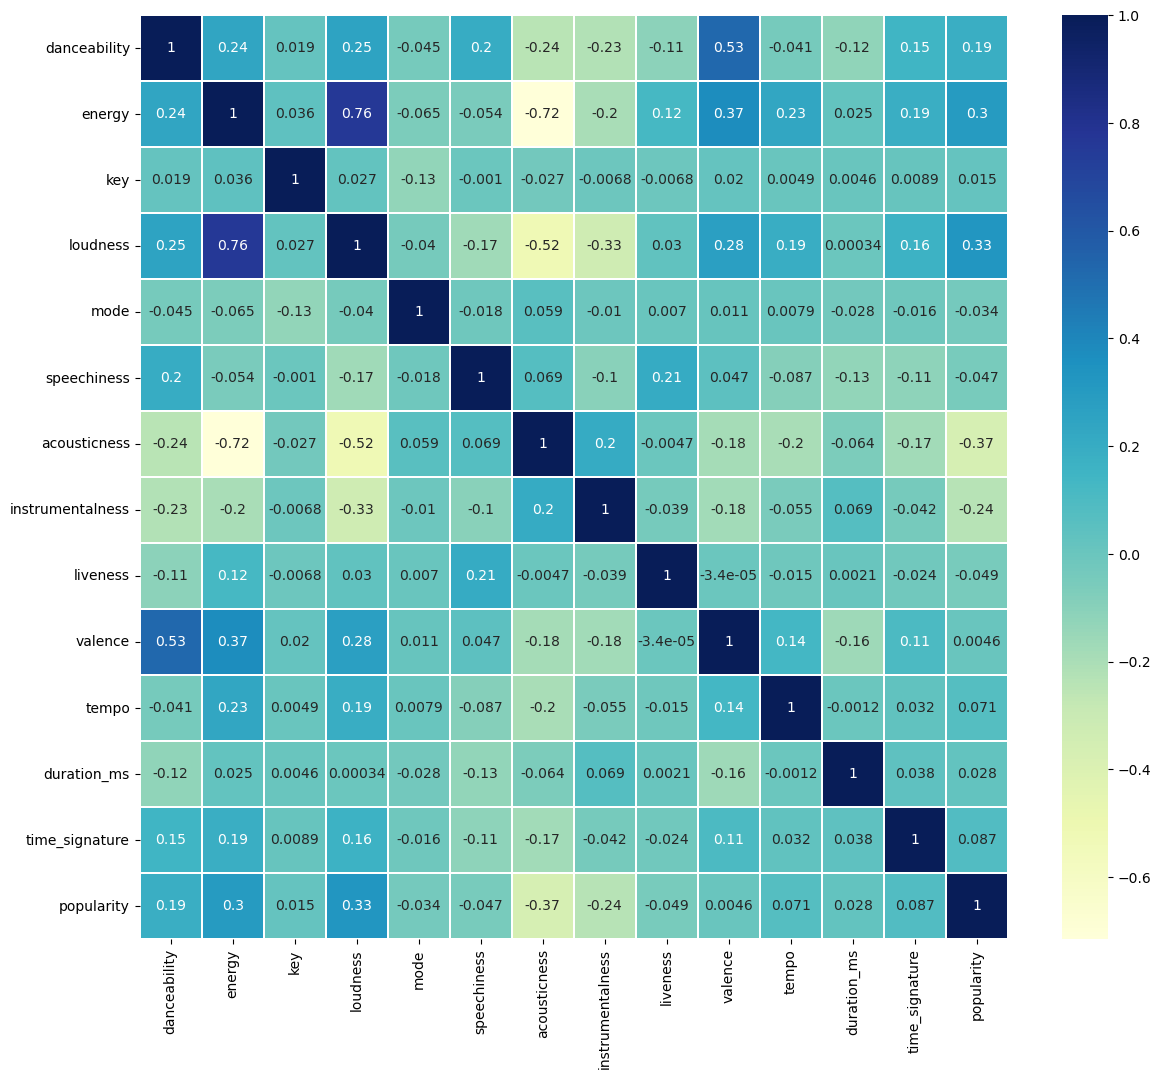

In [42]:
# Heatmap to visualize data relationships
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

#### Strong positive correlations:

energy: loudness (0.76)

#### Moderate correlations:
valence: danceability (0.53)
<br> valence: energy(0.37)


#### Strong negative correaltions:
energy: acousticness (-0.72)


#### Moderate negative correlations:
loudness: acousticness (-0.52)
<br> acousticness: popularity (-0.37)
<br> 

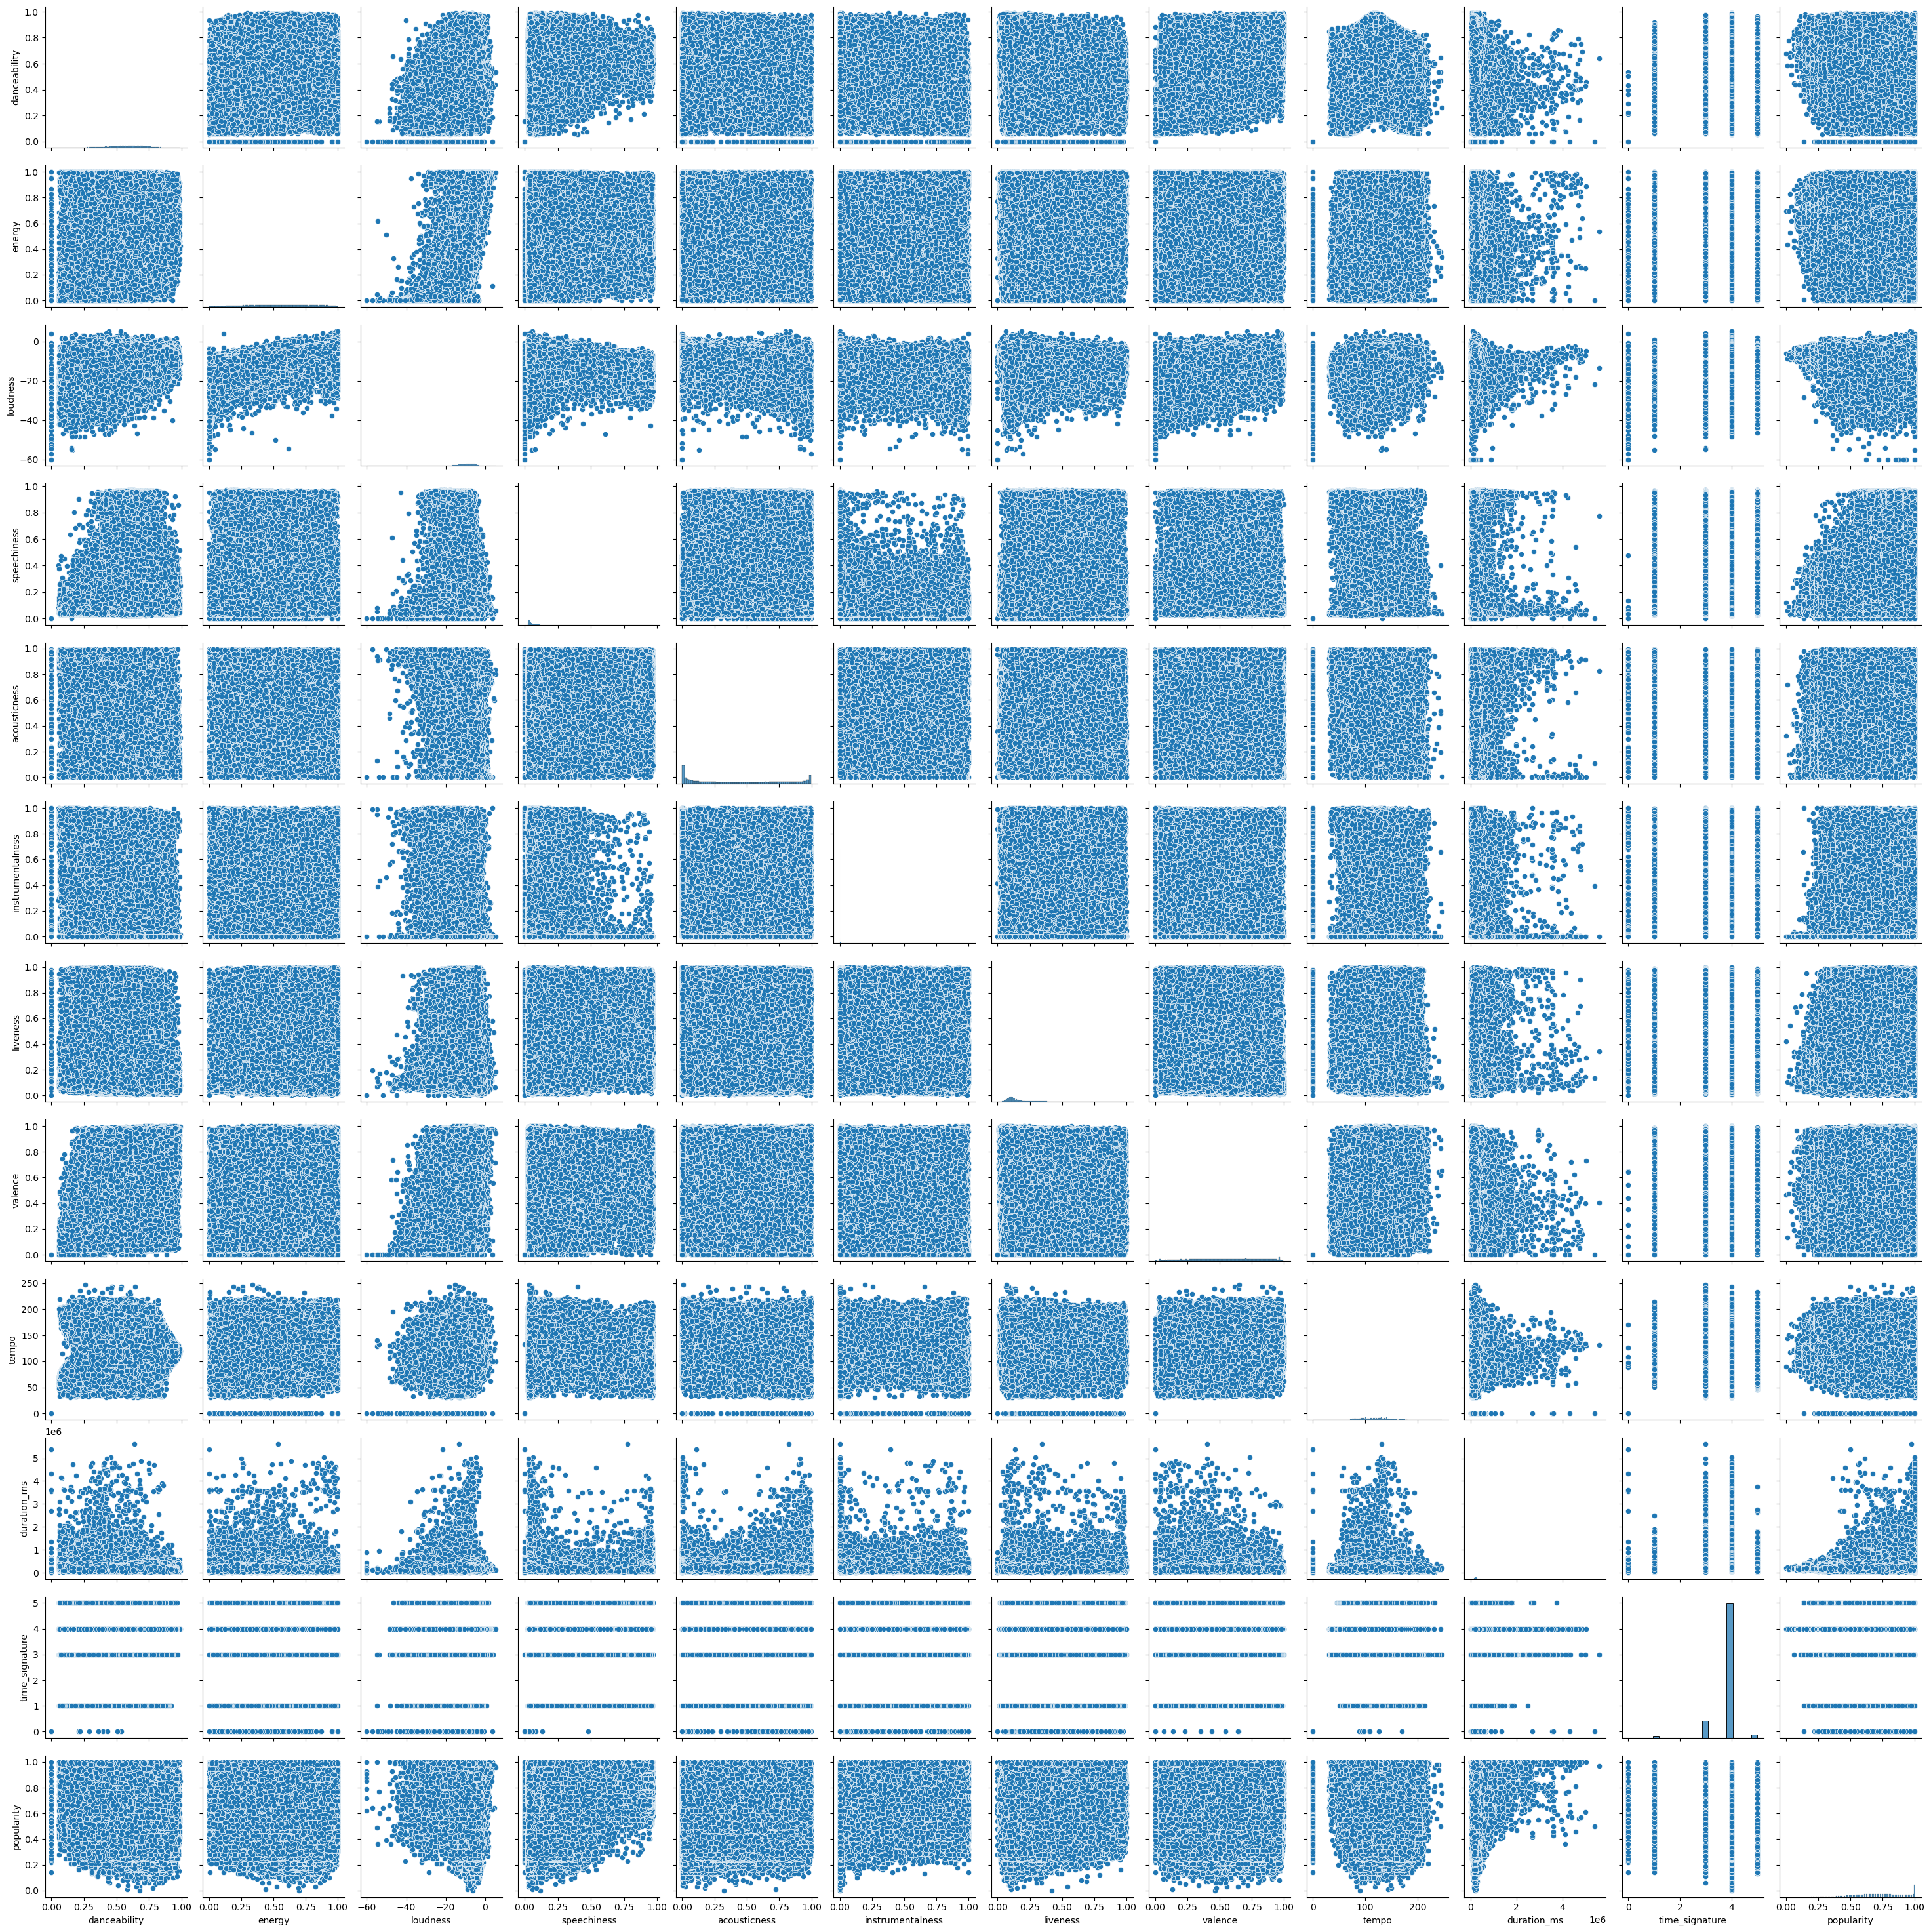

In [44]:
g= sns.pairplot(df_num, palette= 'Set1')
plt.show()

## Correlations:
The findings from EDA revealed that the strongest correlation lies between energy and loudness (r=0.76). This makes intuitive sense, because loud music (i.e. hip hop and EDM) are associated with more energy.

<br> There is also moderate positive correlations between valence and danceability (r= 0.53). This also makes intuitive sense, as people are more likely to dance to "happy" or "fun" songs. Another positive correlation was seeen in valence and energy (r= 0.37). This also makes sense as those songs that convey "fun" emotions also tend to be more energetic. 

<br>There was a strong negative correlation between energy and acousticness (r= -0.72). This also makes intuitive sense, as acoustic versions of songs tend to be more relaxed in arrangement and overall texture/quality. This is further supported by moderate negative correlation between acousticness and loudness. More acoustic a song is, quieter it is. 

<br>There isn't any particular feature that has strong positive correlation with popularity. Energy and loudness have weak positive correlation with popularity, with r= 0.3 andr= 0.33, respectively. This makes sense as loud music is perceived to be better.There is also a moderate negative correlation between popularity and acousticness (-0.37). 
